In [1]:
#We are in a world nowadays where countless consumers are immersed in the media world and there has been a rising interest in 
#video games and watching content creators play video games.
#However, the problem seems to be finding the right content creators and finding the right audiences for these content creators
#to keep the interest higher and the produce the revenue for such companies. 
#Finding the right interests for such and right recommendation machines for these pages require a lot of data learning and 
#understand of the audience in order to cater to the consumer
#We will be using this twitch data in order to look at the trends in viewers and streamers in order to better understand
#how the industry works

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np 
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
import warnings

In [3]:
df = pd.read_csv('C:/Users/rishp/Downloads/archive/twitchdata-update.csv')

In [17]:
df.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Watchtimeperfollower,Streamtimeperfollower
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,0,English,1908.685447,0.066306
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,0,English,1147.173317,0.039894
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,1,Portuguese,3193.301171,0.291508
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,0,English,1006.456048,0.131245
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,0,English,410.676799,0.013834


In [18]:
df.loc[df['Mature'] == True, 'Mature'] = 1
df.loc[df['Mature'] == False, 'Mature'] = 0
df.loc[df['Partnered'] == True, 'Partnered'] = 1
df.loc[df['Partnered'] == False, 'Partnered'] = 0

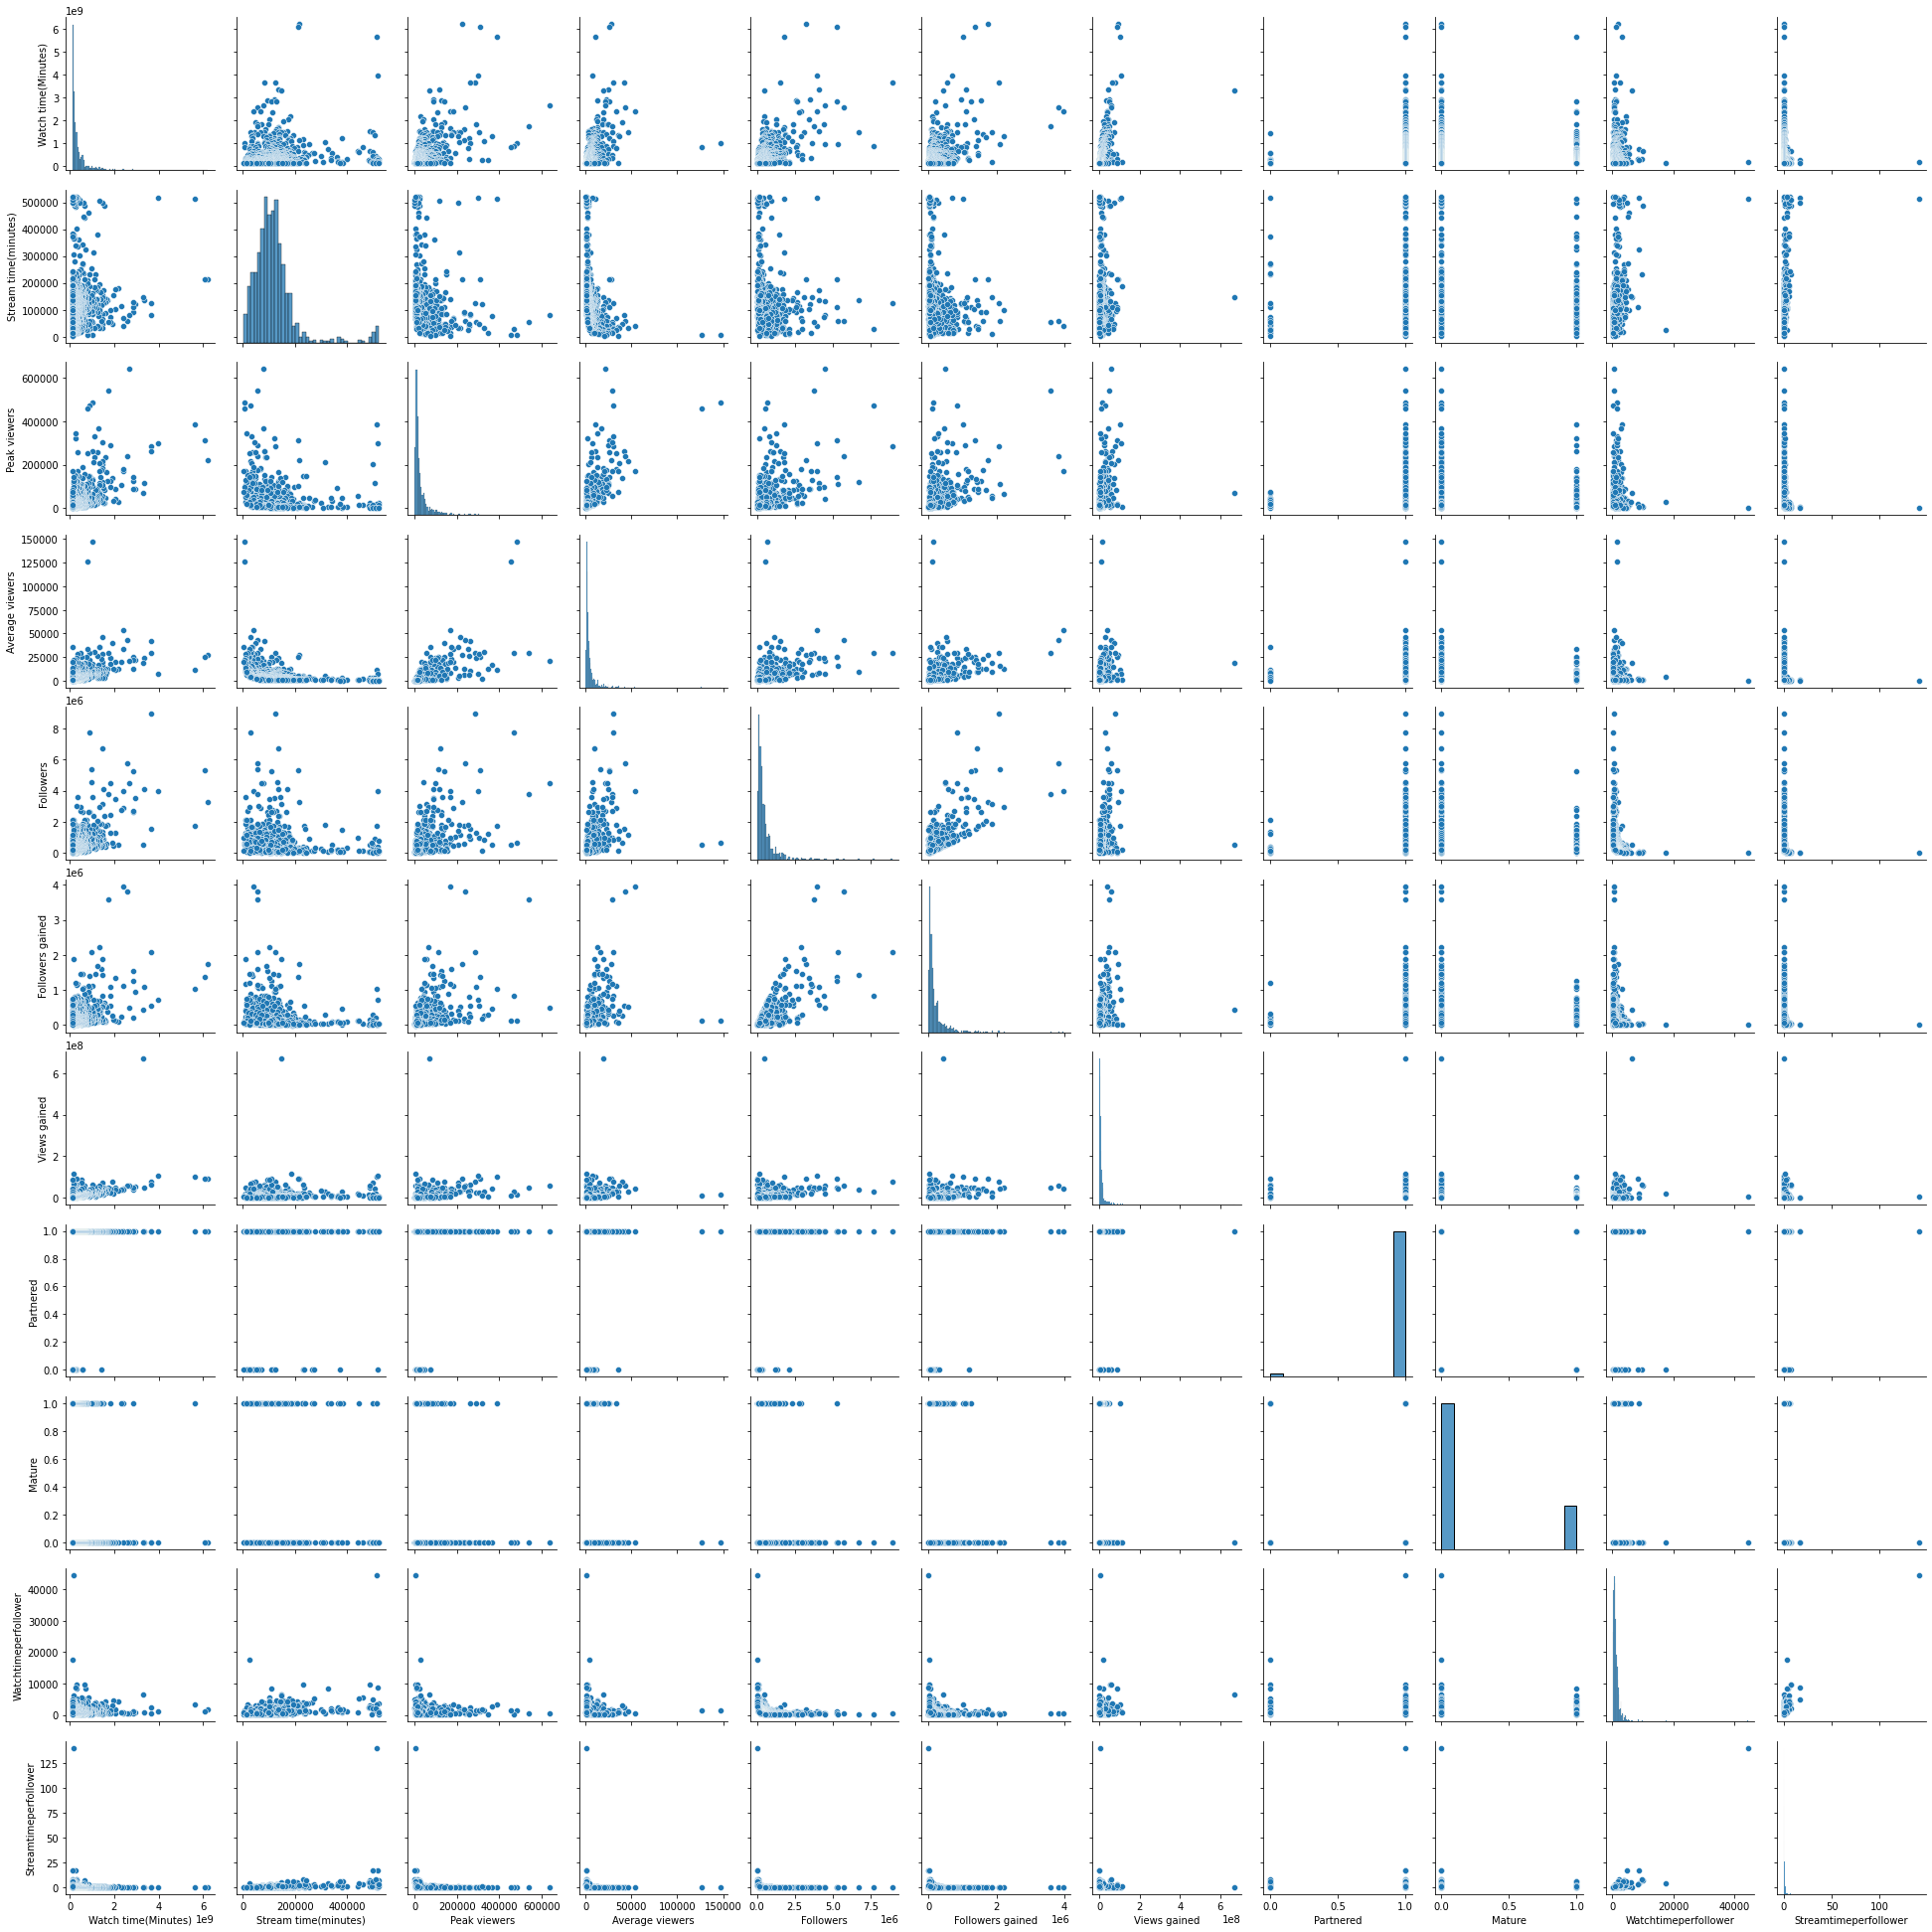

In [19]:
sns.pairplot(df)

In [ ]:
#Here you can see that there is some correlation between a few of the variables such as Viewers, and followers against the 
#stream and watch time. This can be expected as the more followers you have, the more minutes you would stream. We would love 
#to receive more demographic data on the audiences in order to understand what recommendations we would like to make to any 
#potential viewer

In [7]:
df['Watchtimeperfollower'] = df['Watch time(Minutes)']/df['Followers']
df['Streamtimeperfollower'] = df['Stream time(minutes)']/df['Followers']

(array([982.,  14.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([   62.082399  ,  4496.05612632,  8930.02985363, 13364.00358094,
        17797.97730825, 22231.95103557, 26665.92476288, 31099.89849019,
        35533.87221751, 39967.84594482, 44401.81967213]),
 <BarContainer object of 10 artists>)

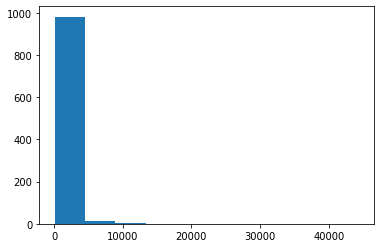

In [8]:
plt.hist(df['Watchtimeperfollower'])

(array([997.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([3.38090679e-03, 1.40698461e+01, 2.81363113e+01, 4.22027765e+01,
        5.62692417e+01, 7.03357068e+01, 8.44021720e+01, 9.84686372e+01,
        1.12535102e+02, 1.26601568e+02, 1.40668033e+02]),
 <BarContainer object of 10 artists>)

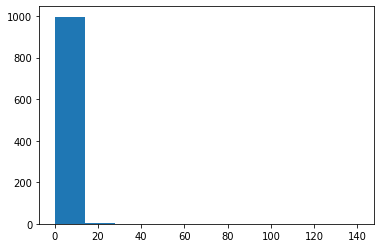

In [9]:
plt.hist(df['Streamtimeperfollower'])

In [29]:
df['Streamtimeperfollower'].describe()

count    1000.000000
mean        0.778380
std         4.575022
min         0.003381
25%         0.131972
50%         0.310431
75%         0.718692
max       140.668033
Name: Streamtimeperfollower, dtype: float64

In [30]:
df['Watchtimeperfollower'].describe()

count     1000.000000
mean      1246.314751
std       1825.131059
min         62.082399
25%        504.698378
50%        860.981890
75%       1518.256903
max      44401.819672
Name: Watchtimeperfollower, dtype: float64

In [31]:
#looks like the data is highly skewed towards to the right since there is a very large gap between the popular streamers and the
#average streamer. the average follower has a mean of 1246 minutes of watching time and the average streamer streams .77 minutes
#per follower. Therefore we can assume that if a streamer follows a certain protocol of obtaining followers they should be 
#obtaining a follower a minute at the very least

In [10]:
df.corr()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Watchtimeperfollower,Streamtimeperfollower
Watch time(Minutes),1.000000,0.150588,0.582797,0.476165,0.620234,0.514648,0.529862,0.038258,0.072409,-0.049606
Stream time(minutes),0.150588,1.000000,-0.119540,-0.249248,-0.091299,-0.158165,0.064370,-0.007073,0.326869,0.283992
Peak viewers,0.582797,-0.119540,1.000000,0.682637,0.532529,0.470415,0.298063,0.028112,-0.036286,-0.064584
Average viewers,0.476165,-0.249248,0.682637,1.000000,0.428303,0.420097,0.250349,-0.008983,-0.030368,-0.065461
Followers,0.620234,-0.091299,0.532529,0.428303,1.000000,0.715618,0.276467,0.044418,-0.199114,-0.087910
Followers gained,0.514648,-0.158165,0.470415,0.420097,0.715618,1.000000,0.244297,0.027465,-0.150782,-0.074018
Views gained,0.529862,0.064370,0.298063,0.250349,0.276467,0.244297,1.000000,-0.035313,0.133544,-0.022127
Partnered,0.038258,-0.007073,0.028112,-0.008983,0.044418,0.027465,-0.035313,1.000000,-0.157008,-0.027116
Watchtimeperfollower,0.072409,0.326869,-0.036286,-0.030368,-0.199114,-0.150782,0.133544,-0.157008,1.000000,0.827163
Streamtimeperfollower,-0.049606,0.283992,-0.064584,-0.065461,-0.087910,-0.074018,-0.022127,-0.027116,0.827163,1.000000


<AxesSubplot:>

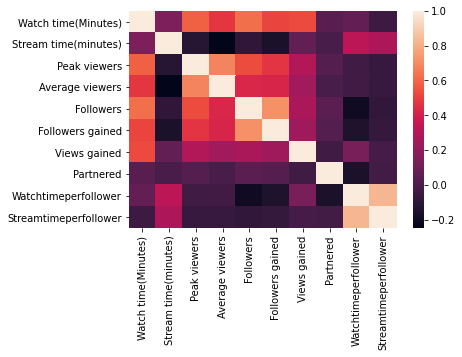

In [11]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Watch time(Minutes)', ylabel='Followers'>

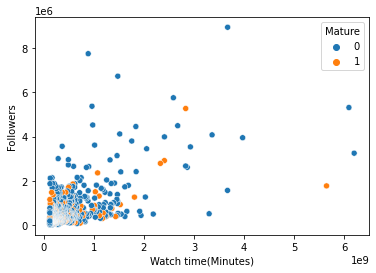

In [16]:
sns.scatterplot(data = df,x ='Watch time(Minutes)', y= 'Followers', hue='Mature')

<AxesSubplot:xlabel='Watch time(Minutes)', ylabel='Followers'>

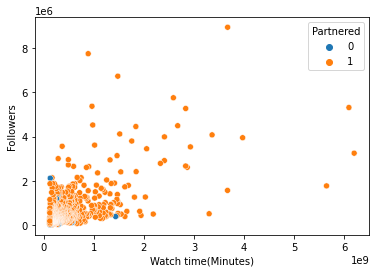

In [20]:
sns.scatterplot(data = df,x ='Watch time(Minutes)', y= 'Followers', hue='Partnered')

<AxesSubplot:xlabel='Watch time(Minutes)', ylabel='Followers'>

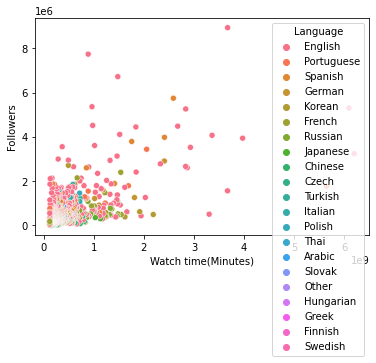

In [21]:
sns.scatterplot(data = df,x ='Watch time(Minutes)', y= 'Followers', hue='Language')

In [23]:
nonenglish = df.loc[df['Language'] != 'English']

<AxesSubplot:xlabel='Watch time(Minutes)', ylabel='Followers'>

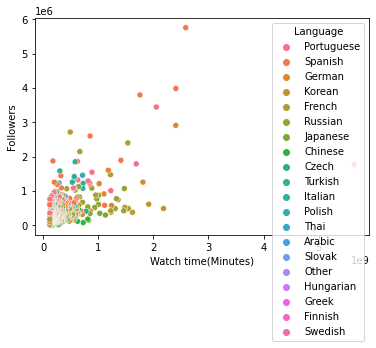

In [24]:
sns.scatterplot(data = nonenglish,x ='Watch time(Minutes)', y= 'Followers', hue='Language')

In [26]:
nonenglish['Language'].value_counts()

Korean        77
Russian       74
Spanish       68
French        66
Portuguese    61
German        49
Chinese       30
Turkish       22
Italian       17
Polish        12
Thai          11
Japanese      10
Czech          6
Arabic         5
Hungarian      2
Swedish        1
Finnish        1
Slovak         1
Other          1
Greek          1
Name: Language, dtype: int64

In [33]:
#Since a lot of the streamers are english streamers we would want to look at expanding the streaming world to other countries
#and we can see that there is a market for it in Korean speaking and Russian speaking places. We should gain language data in
#order to ascertain certain marketing potential for twitch in order to allow for growth

In [34]:
#There is a lot of potential to work with twitch data in order to allow for the opportunity to grow and as a data scientist 
#there is a lot of areas to tap into and gain data in order to promote different aspects of this industry. 